In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%config InlineBackend.figure_formats = ['svg']

In [24]:
def dprime(hitrate, farate):
    import scipy.stats as stats
    if hitrate == 0:
        hitrate = .01
    elif hitrate == 1:
        hitrate = .99
    
    if farate == 0:
        farate = .01
    elif farate == 1:
        farate = .99
    
    hrnew = stats.norm.ppf(hitrate)
    msnew = stats.norm.ppf(farate)
    d = hrnew - msnew
    return d


data = []
for i in range(1,29):
    df = pd.read_csv(f'{i}.csv', delimiter = ',')
    df = df[['trials.thisN', 'resp_key.rt', 'resp_key.keys', 'Box orientation', 'Target', 'Condition']]
    df = df[df['trials.thisN']>7]
    df['resp_recoded'] = df['resp_key.keys'].apply(lambda x: 1 if x == 'y' else 0 )
    #df = pd.concat([df, df_temp], ignore_index=True)
    #hits:
    df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 1), 'hits'] = 1
    df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 0), 'hits'] = 0
    df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 1), 'hits'] = 0
    df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 0), 'hits'] = 0
    
    # misses:
    df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 1), 'misses'] = 0
    df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 0), 'misses'] = 1
    df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 1), 'misses'] = 0
    df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 0), 'misses'] = 0
    
    #false alarms
    df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 1), 'FA'] = 0
    df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 0), 'FA'] = 0
    df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 1), 'FA'] = 1
    df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 0), 'FA'] = 0
    
    #correct rejections
    df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 1), 'CR'] = 0
    df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 0), 'CR'] = 0
    df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 1), 'CR'] = 0
    df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 0), 'CR'] = 1
    
    #overall proportion of hits
    sum_allhits = np.sum(df['hits'])
    sum_allmisses = np.sum(df['misses'])
    dp_allhits = sum_allhits / (sum_allhits + sum_allmisses)

    #overall proportion of false alarms
    sum_allfa = np.sum(df['FA'])
    sum_allcr = np.sum(df['CR'])
    dp_allfa = sum_allfa / (sum_allfa + sum_allcr)
    
    #sums of hits,fa,CR and misses per condition
    sum_hits0 = np.sum(df['hits'][df['Condition']== 0.0])
    sum_hits1 = np.sum(df['hits'][df['Condition']== 1.0])
    sum_hits2 = np.sum(df['hits'][df['Condition']== 2.0])
    sum_hits3 = np.sum(df['hits'][df['Condition']== 3.0])

    sum_fa0 = np.sum(df['FA'][df['Condition']== 0.0])
    sum_fa1 = np.sum(df['FA'][df['Condition']== 1.0])
    sum_fa2 = np.sum(df['FA'][df['Condition']== 2.0])
    sum_fa3 = np.sum(df['FA'][df['Condition']== 3.0])

    sum_misses0 = np.sum(df['misses'][df['Condition']== 0.0])
    sum_misses1 = np.sum(df['misses'][df['Condition']== 1.0])
    sum_misses2 = np.sum(df['misses'][df['Condition']== 2.0])
    sum_misses3 = np.sum(df['misses'][df['Condition']== 3.0])

    sum_cr0 = np.sum(df['CR'][df['Condition']== 0.0])
    sum_cr1 = np.sum(df['CR'][df['Condition']== 1.0])
    sum_cr2 = np.sum(df['CR'][df['Condition']== 2.0])
    sum_cr3 = np.sum(df['CR'][df['Condition']== 3.0])

    #proportion of hits and FA per condition

    dp_hits0 = sum_hits0 / (sum_hits0 + sum_misses0)
    dp_hits1 = sum_hits1 / (sum_hits1 + sum_misses1)
    dp_hits2 = sum_hits2 / (sum_hits2 + sum_misses2)
    dp_hits3 = sum_hits3 / (sum_hits3 + sum_misses3)

    dp_fa0 = sum_fa0 / (sum_fa0 + sum_cr0)
    dp_fa1 = sum_fa1 / (sum_fa1 + sum_cr1)
    dp_fa2 = sum_fa2 / (sum_fa2 + sum_cr2)
    dp_fa3 = sum_fa3 / (sum_fa3 + sum_cr3)
    
    # d primes
    dp_0 = dprime(dp_hits0, dp_fa0)
    dp_1 = dprime(dp_hits1, dp_fa1)
    dp_2 = dprime(dp_hits2, dp_fa2)
    dp_3 = dprime(dp_hits3, dp_fa3)


#     print("i = ", i, "d primes", dp_hits0,dp_hits1,dp_hits2,dp_hits3)
#     print(dp_fa0,dp_fa1,dp_fa2,dp_fa3)

    #median RT
    #reaction time per condition:
    rt0 = df['resp_key.rt'][df['Condition']== 0.0]
    meanRT_0 = rt0.mean()
    medianRT_0 = rt0.median()
    
    rt1 = df['resp_key.rt'][df['Condition']== 1.0]
    meanRT_1 = rt1.mean()
    medianRT_1 = rt1.median()
    
    rt2 = df['resp_key.rt'][df['Condition']== 2.0]
    meanRT_2 = rt2.mean()
    medianRT_2 = rt2.median()
    
    rt3 = df['resp_key.rt'][df['Condition']== 3.0]
    meanRT_3 = rt3.mean()
    medianRT_3 = rt3.median()
    
    RTcorrect_0 = df['resp_key.rt'][((df['Condition']== 0.0) & (df['hits'] == 1.0)) |((df['Condition']== 0.0) & (df['CR'] == 1.0))]
    RTcorrect_1 = df['resp_key.rt'][((df['Condition']== 1.0) & (df['hits'] == 1.0)) |((df['Condition']== 1.0) & (df['CR'] == 1.0))]
    RTcorrect_2 = df['resp_key.rt'][((df['Condition']== 2.0) & (df['hits'] == 1.0)) |((df['Condition']== 2.0) & (df['CR'] == 1.0))]
    RTcorrect_3 = df['resp_key.rt'][((df['Condition']== 3.0) & (df['hits'] == 1.0)) |((df['Condition']== 3.0) & (df['CR'] == 1.0))]
    
    medianCorrectRT_0 = RTcorrect_0.median()
    medianCorrectRT_1 = RTcorrect_1.median()
    medianCorrectRT_2 = RTcorrect_2.median()
    medianCorrectRT_3 = RTcorrect_3.median()

    RTincorrect_0 = df['resp_key.rt'][((df['Condition']== 0.0) & (df['misses'] == 1.0)) |((df['Condition']== 0.0) & (df['FA'] == 1.0))]
    RTincorrect_1 = df['resp_key.rt'][((df['Condition']== 1.0) & (df['misses'] == 1.0)) |((df['Condition']== 1.0) & (df['FA'] == 1.0))]
    RTincorrect_2 = df['resp_key.rt'][((df['Condition']== 2.0) & (df['misses'] == 1.0)) |((df['Condition']== 2.0) & (df['FA'] == 1.0))]
    RTincorrect_3 = df['resp_key.rt'][((df['Condition']== 3.0) & (df['misses'] == 1.0)) |((df['Condition']== 3.0) & (df['FA'] == 1.0))]
    
    medianIncorrectRT_0 = RTincorrect_0.median()
    medianIncorrectRT_1 = RTincorrect_1.median()
    medianIncorrectRT_2 = RTincorrect_2.median()
    medianIncorrectRT_3 = RTincorrect_3.median()

    data1 = [dp_0, dp_1, dp_2, dp_3, medianCorrectRT_0, medianCorrectRT_1, medianCorrectRT_2, medianCorrectRT_3, medianIncorrectRT_0, medianIncorrectRT_1, medianIncorrectRT_2, medianIncorrectRT_3, medianRT_0, medianRT_1, medianRT_2, medianRT_3, dp_hits0, dp_hits1, dp_hits2, dp_hits3, dp_fa0, dp_fa1, dp_fa2 , dp_fa3, dp_allhits, dp_allfa]
    data.append(data1)
    if i >=29:
        break

In [25]:
df_master = pd.DataFrame(data)



df_master.columns =['dp_0', 'dp_1', 'dp_2', 'dp_3', 'medianCorrectRT_0', 'medianCorrectRT_1','medianCorrectRT_2','medianCorrectRT_3','medianIncorrectRT_0','medianIncorrectRT_1','medianIncorrectRT_2','medianIncorrectRT_3', 'medianRT_0','medianRT_1','medianRT_2','medianRT_3','dp_hits0','dp_hits1','dp_hits2','dp_hits3','dp_fa0','dp_fa1','dp_fa2','dp_fa3','dp_allhits','dp_allfa' ]
df_master.to_csv('df_master.csv', index= True)  
print(df_master)

        dp_0      dp_1      dp_2      dp_3  medianCorrectRT_0  \
0   2.556232  0.316542  0.273417  0.417659           1.362892   
1   1.569396  0.253347  1.316177  1.045454           1.245430   
2   1.479034  0.358506  0.853236  0.539676           0.946189   
3   0.000000  0.114185  0.171530 -0.251323           1.312068   
4   0.396401  0.231526 -0.258918  0.251323           1.075034   
5   0.860128  0.158403  1.096804  1.817074           1.157407   
6   1.107577  0.229884  0.876026  1.510208           0.886861   
7   1.560139  0.410894  1.235324  2.082643           1.187503   
8   0.204989  1.306272  1.120453  0.214006           0.996111   
9   0.588274 -0.058049  0.176525  0.276571           1.030867   
10  0.595914  0.812218  0.379214  0.349712           1.621527   
11  0.660611  0.777748  1.190674  0.967283           1.093710   
12  1.413025  2.050427  0.396401  0.765150           1.073822   
13  0.348756  0.498929  0.777748  0.684074           1.300246   
14  0.047494  0.612499  0

In [ ]:
def dprime(hitrate, farate):
    import scipy.stats as stats
    if hitrate == 0:
        hitrate = .01
    elif hitrate == 1:
        hitrate = .99
    
    if farate == 0:
        farate = .01
    elif farate == 1:
        farate = .99
    
    hrnew = stats.norm.ppf(hitrate)
    msnew = stats.norm.ppf(farate)
    d = hrnew - msnew
    return d



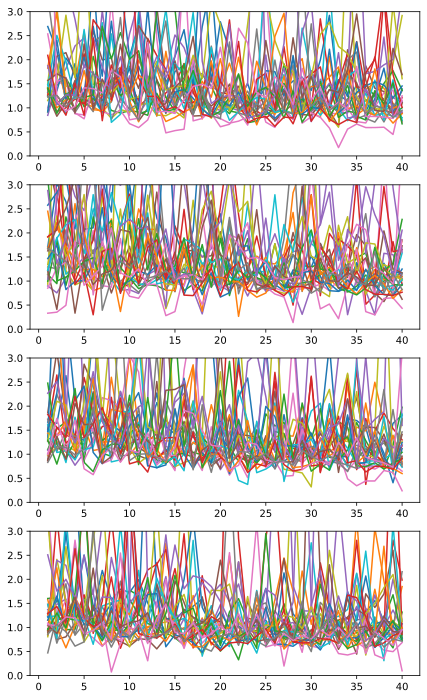

In [3]:
i=1
df = pd.read_csv(f'{i}.csv', delimiter = ',')
df = df[['trials.thisN', 'resp_key.rt', 'resp_key.keys', 'Box orientation', 'Target', 'Condition']]
df = df[df['trials.thisN']>7]
df['resp_recoded'] = df['resp_key.keys'].apply(lambda x: 1 if x == 'y' else 0 )
fig,ax = plt.subplots(4,1, figsize = (7,12))
time = np.linspace(1,40,40)
for i in range(1,29):
    df2 = pd.read_csv(f'{i}.csv', delimiter = ',')
    df2 = df2[['trials.thisN', 'resp_key.rt', 'resp_key.keys', 'Box orientation', 'Target', 'Condition']]
    df2 = df2[df2['trials.thisN']>7]
    df2['resp_recoded'] = df2['resp_key.keys'].apply(lambda x: 1 if x == 'y' else 0 )
    #df = pd.concat([df, df2], ignore_index=True)
    ax[0].plot(time,df2['resp_key.rt'][df2['Condition']== 0.0],label = 'condition 0')
    ax[1].plot(time,df2['resp_key.rt'][df2['Condition']== 1.0],label = 'condition 0')
    ax[2].plot(time,df2['resp_key.rt'][df2['Condition']== 2.0],label = 'condition 0')
    ax[3].plot(time,df2['resp_key.rt'][df2['Condition']== 3.0],label = 'condition 0')
    ax[0].set_ylim(0,3)
    ax[1].set_ylim(0,3)
    ax[2].set_ylim(0,3)
    ax[3].set_ylim(0,3)
    if i >=29:
        break

# time = np.linspace(1,40,40)
# plt.figure()
# plt.plot(time,df['resp_key.rt'][df['Condition']== 0.0],label = 'condition 0')
# plt.figure()
# plt.plot(time,df['resp_key.rt'][df['Condition']== 1.0],label = 'condition 1')
# plt.figure()
# plt.plot(time,df['resp_key.rt'][df['Condition']== 2.0],label = 'condition 2')
# plt.figure()
# plt.plot(time,df['resp_key.rt'][df['Condition']== 3.0],label = 'condition 3')
# plt.legend()

In [ ]:
# df1 = pd.read_csv('1.csv', delimiter = ',')
# df1 = df1[['trials.thisN', 'resp_key.rt', 'resp_key.keys', 'Box orientation', 'Target', 'Condition']]
# #df = df[df['resp_key.rt']>0]
# df1 = df1[df1['trials.thisN']>7]
# df1['resp_recoded'] = df1['resp_key.keys'].apply(lambda x: 1 if x == 'y' else 0 )
# # print(df_1)

In [ ]:
# #df[:3]
# # df['Accuracy'] = df.apply(lambda x: 1 if x['Target'] == x['resp_recoded'] else 0, axis=1)
# # df.loc[df['Target'] == df['resp_recoded'], 'Accuracy'] = 1
# # df.loc[df['COL_2'] == 0, 'RESULT'] = -1
# # df.loc[df['COL_1'] > df['COL_2'], 'RESULT'] = 0

# #hits:
# df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 1), 'hits'] = 1
# df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 0), 'hits'] = 0
# df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 1), 'hits'] = 0
# df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 0), 'hits'] = 0
# #print(df)

In [ ]:
# # misses:
# df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 1), 'misses'] = 0
# df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 0), 'misses'] = 1
# df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 1), 'misses'] = 0
# df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 0), 'misses'] = 0
# # print(df)

In [ ]:
# #false alarms
# df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 1), 'FA'] = 0
# df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 0), 'FA'] = 0
# df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 1), 'FA'] = 1
# df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 0), 'FA'] = 0
# # print(df)

In [ ]:
# #correct rejections
# df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 1), 'CR'] = 0
# df.loc[(df['Target'] == '[1]') & (df['resp_recoded'] == 0), 'CR'] = 0
# df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 1), 'CR'] = 0
# df.loc[(df['Target'] == '[0]') & (df['resp_recoded'] == 0), 'CR'] = 1
# # print(df)

In [ ]:
# #overall d' hits
# sum_allhits = np.sum(df['hits'])
# sum_allmisses = np.sum(df['misses'])
# dp_allhits = sum_allhits / (sum_allhits + sum_allmisses)

# #overall d' false alarms
# sum_allfa = np.sum(df['FA'])
# sum_allcr = np.sum(df['CR'])
# dp_allfa = sum_allfa / (sum_allfa + sum_allcr)

# print(dp_allhits)
# print(dp_allfa)

In [ ]:
# #sums of hits,fa,CR and misses per condition
# sum_hits0 = np.sum(df['hits'][df['Condition']== 0.0])
# sum_hits1 = np.sum(df['hits'][df['Condition']== 1.0])
# sum_hits2 = np.sum(df['hits'][df['Condition']== 2.0])
# sum_hits3 = np.sum(df['hits'][df['Condition']== 3.0])

# sum_fa0 = np.sum(df['FA'][df['Condition']== 0.0])
# sum_fa1 = np.sum(df['FA'][df['Condition']== 1.0])
# sum_fa2 = np.sum(df['FA'][df['Condition']== 2.0])
# sum_fa3 = np.sum(df['FA'][df['Condition']== 3.0])

# sum_misses0 = np.sum(df['misses'][df['Condition']== 0.0])
# sum_misses1 = np.sum(df['misses'][df['Condition']== 1.0])
# sum_misses2 = np.sum(df['misses'][df['Condition']== 2.0])
# sum_misses3 = np.sum(df['misses'][df['Condition']== 3.0])

# sum_cr0 = np.sum(df['CR'][df['Condition']== 0.0])
# sum_cr1 = np.sum(df['CR'][df['Condition']== 1.0])
# sum_cr2 = np.sum(df['CR'][df['Condition']== 2.0])
# sum_cr3 = np.sum(df['CR'][df['Condition']== 3.0])

In [ ]:
# #d primes per condition

# dp_hits0 = sum_hits0 / (sum_hits0 + sum_misses0)
# dp_hits1 = sum_hits1 / (sum_hits1 + sum_misses1)
# dp_hits2 = sum_hits2 / (sum_hits2 + sum_misses2)
# dp_hits3 = sum_hits3 / (sum_hits3 + sum_misses3)

# dp_fa0 = sum_fa0 / (sum_fa0 + sum_cr0)
# dp_fa1 = sum_fa1 / (sum_fa1 + sum_cr1)
# dp_fa2 = sum_fa2 / (sum_fa2 + sum_cr2)
# dp_fa3 = sum_fa3 / (sum_fa3 + sum_cr3)

# print(dp_hits0,dp_hits1,dp_hits2,dp_hits3)
# print(dp_fa0,dp_fa1,dp_fa2,dp_fa3)

# #median RT
# meanRT = df['resp_key.rt'].mean()
# medianRT = df['resp_key.rt'].median()

# print(meanRT, medianRT)

    #print("i = " , i, "mean and median",meanRT, medianRT)
#     df2 = pd.DataFrame(columns=['dp_hits0','dp_hits1','dp_hits2','dp_hits3','dp_fa0','dp_fa1','dp_fa2','dp_fa3','dp_allhits','dp_allfa','meanRT','medianRT' ])
#     df2.loc[i, ['dp_hits0']] = dp_hits0
#     df2.loc[i, ['dp_hits1']] = dp_hits1
#     df2.loc[i, ['dp_hits2']] = dp_hits2
#     df2.loc[i, ['dp_hits3']] = dp_hits3
#     df2.loc[i, ['dp_fa0']] = dp_fa0
#     df2.loc[i, ['dp_fa1']] = dp_fa1
#     df2.loc[i, ['dp_fa2']] = dp_fa2
#     df2.loc[i, ['dp_fa3']] = dp_fa3
#     df2.loc[i, ['dp_allhits']] = dp_allhits
#     df2.loc[i, ['dp_allfa']] = dp_allfa
#     df2.loc[i, ['meanRT']] = meanRT
#     df2.loc[i, ['medianRT']] = medianRT